In [15]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Input
LOD = ctrl.Antecedent(np.linspace(0, 6, 1000), 'LOD')            # Left Obstacle Distance
ROD = ctrl.Antecedent(np.linspace(0, 6, 1000), 'ROD')            # Right Obstacle Distance
FOD = ctrl.Antecedent(np.linspace(0, 6, 1000), 'FOD')            # Front Obstacle Distance
ANG = ctrl.Antecedent(np.linspace(-180, 180, 1000), 'ANG')   # Bearing angle
# Output 
VL = ctrl.Consequent(np.linspace(0, 2, 1000), 'VL')        # Left Wheel Velocity
VR = ctrl.Consequent(np.linspace(0, 2, 1000), 'VR')        # Right Wheel Velocity

/home/tinzog/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


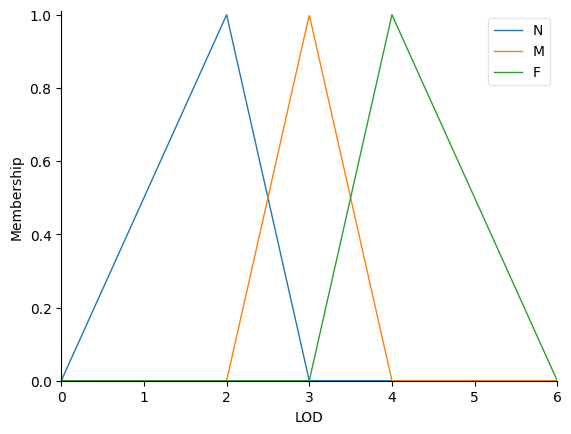

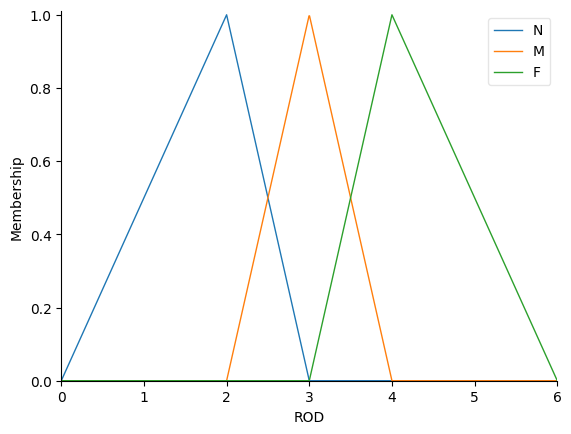

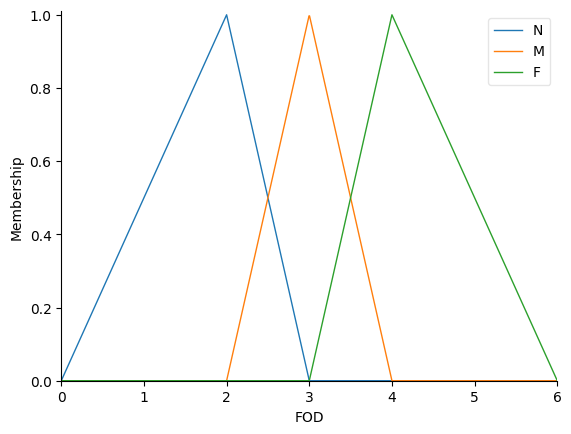

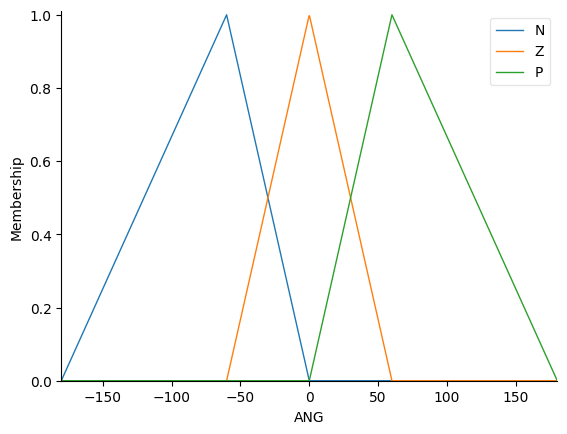

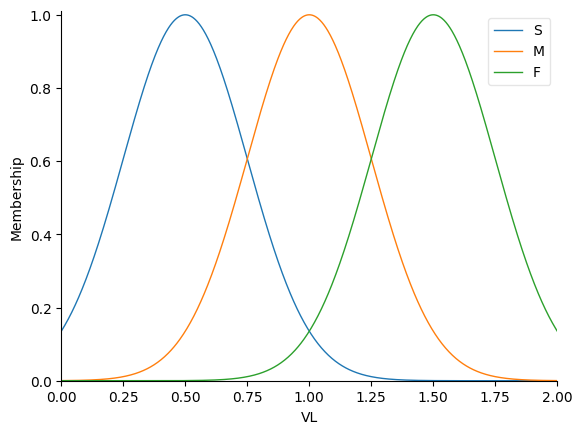

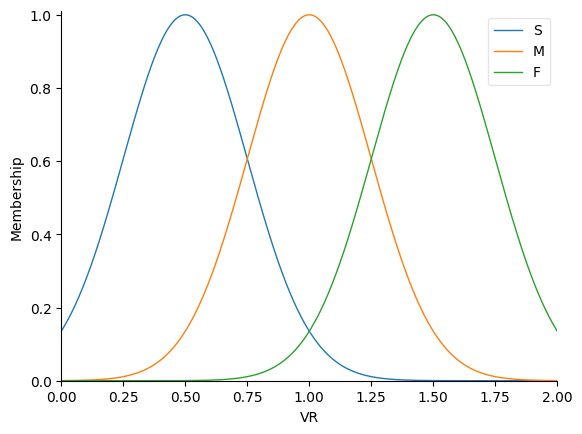

In [17]:
# Membership functions

# LOD
LOD['N']  = fuzz.trimf(LOD.universe, [0,2,3])   # Near
LOD['M']  = fuzz.trimf(LOD.universe, [2,3,4])   # Medium
LOD['F']  = fuzz.trimf(LOD.universe, [3,4,6])   # Far
LOD.view()

# ROD
ROD['N']  = fuzz.trimf(ROD.universe, [0,2,3])
ROD['M']  = fuzz.trimf(ROD.universe, [2,3,4])
ROD['F']  = fuzz.trimf(ROD.universe, [3,4,6])
ROD.view()

# FOD
FOD['N']  = fuzz.trimf(FOD.universe, [0,2,3])
FOD['M']  = fuzz.trimf(FOD.universe, [2,3,4])
FOD['F']  = fuzz.trimf(FOD.universe, [3,4,6])
FOD.view()

# ANG
ANG['N'] = fuzz.trimf(ANG.universe, [-180,  -60,    0]) # Negative 
ANG['Z'] = fuzz.trimf(ANG.universe,[ -60,    0,   60]) # Zero
ANG['P'] = fuzz.trimf(ANG.universe, [   0,   60,  180]) # Positive 
ANG.view()

#VL
VL['S']  = fuzz.gaussmf(VL.universe, 0.5, 0.25) # Slow
VL['M']  = fuzz.gaussmf(VL.universe, 1.0, 0.25) # Meddium
VL['F']  = fuzz.gaussmf(VL.universe, 1.5, 0.25) # Fast
VL.view()

#VR
VR['S']  = fuzz.gaussmf(VR.universe, 0.5, 0.25) # Slow
VR['M']  = fuzz.gaussmf(VR.universe, 1.0, 0.25) # Medium
VR['F']  = fuzz.gaussmf(VR.universe, 1.5, 0.25) # Fast
VR.view()


In [18]:
rule = []

rule.append(ctrl.Rule(LOD['N'] & FOD['F'] & ROD['M'] & ANG['P'], (VL['F'], VR['S'])))
rule.append(ctrl.Rule(LOD['N'] & FOD['M'] & ROD['F'] & ANG['P'], (VL['F'], VR['S'])))
rule.append(ctrl.Rule(LOD['N'] & FOD['M'] & ROD['N'] & ANG['N'], (VL['S'], VR['F'])))
rule.append(ctrl.Rule(LOD['F'] & FOD['N'] & ROD['M'] & ANG['N'], (VL['S'], VR['F'])))
rule.append(ctrl.Rule(LOD['F'] & FOD['M'] & ROD['N'] & ANG['P'], (VL['F'], VR['S'])))
rule.append(ctrl.Rule(LOD['F'] & FOD['F'] & ROD['F'] & ANG['N'], (VL['S'], VR['F'])))

rule.append(ctrl.Rule(LOD['N'] & FOD['F'] & ROD['N'] & ANG['P'], (VL['S'], VR['S'])))
rule.append(ctrl.Rule(LOD['N'] & FOD['M'] & ROD['F'] & ANG['P'], (VL['F'], VR['S'])))
rule.append(ctrl.Rule(LOD['N'] & FOD['F'] & ROD['F'] & ANG['P'], (VL['F'], VR['S'])))
rule.append(ctrl.Rule(LOD['M'] & FOD['F'] & ROD['N'] & ANG['N'], (VL['S'], VR['M'])))
rule.append(ctrl.Rule(LOD['F'] & FOD['M'] & ROD['N'] & ANG['N'], (VL['M'], VR['F'])))
rule.append(ctrl.Rule(LOD['F'] & FOD['F'] & ROD['N'] & ANG['N'], (VL['M'], VR['F'])))

# Control system
V_control = ctrl.ControlSystem(rule)
V_simulation = ctrl.ControlSystemSimulation(V_control)


ValueError: Membership function 'VF' does not exist for Antecedent ROD.
Available options: 'N'; 'M', or 'F'.

In [ ]:
V_simulation.input['LOD'] = 3
V_simulation.input['FOD'] = 2.1
V_simulation.input['ROD'] = 1.5
V_simulation.input['ANG'] = 65

V_simulation.compute()
print('VR: ',V_simulation.output['VR'])
print('VL: ',V_simulation.output['VL'])



NameError: name 'V_simulation' is not defined